#  Retail Store Sales EDA

This notebook performs exploratory data analysis (EDA) on a retail store sales dataset. It includes cleaning, summary statistics, and visualizations.

---

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

In [13]:
# Load cleaned dataset
df = pd.read_csv('/content/sample_data/retail_store_sales.csv')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


##  Data Cleaning

In [14]:
# Check missing values
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


In [23]:
df['Item'] = df['Item'].fillna('Unknown')
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())
df['Discount Applied'] = df['Discount Applied'].fillna(False)

# Confirm no missing values remain
display(df.isnull().sum())


,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,0
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


## Descriptive Statistics

In [26]:
df.describe(include='all')

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,12575,12575.000000,12575.000000,12575.000000,12575,12575,12575,12575
unique,12575,25,8,201,NaN,NaN,NaN,3,2,NaN,2
top,TXN_2407494,CUST_05,Electric household essentials,Unknown,NaN,NaN,NaN,Cash,Online,NaN,False
freq,1,544,1591,1213,NaN,NaN,NaN,4310,6354,NaN,8356
mean,NaN,NaN,NaN,NaN,23.348191,5.558648,128.636581,NaN,NaN,2023-07-12 20:23:41.105368064,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,2022-01-01 00:00:00,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,55.000000,NaN,NaN,2022-09-30 00:00:00,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,108.500000,NaN,NaN,2023-07-13 00:00:00,NaN
75%,NaN,NaN,NaN,NaN,32.000000,8.000000,184.000000,NaN,NaN,2024-04-24 00:00:00,NaN
max,NaN,NaN,NaN,NaN,41.000000,10.000000,410.000000,NaN,NaN,2025-01-18 00:00:00,NaN


## Sales By Location

/tmp/ipython-input-3079913570.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Location', y='Total Spent', estimator='sum', ci=None)


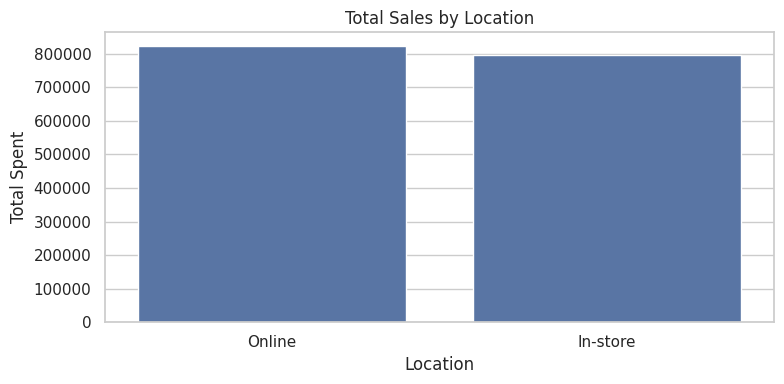

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Location', y='Total Spent', estimator='sum', ci=None)
plt.title('Total Sales by Location')
plt.tight_layout()
plt.show()

## Top 10 Selling Items

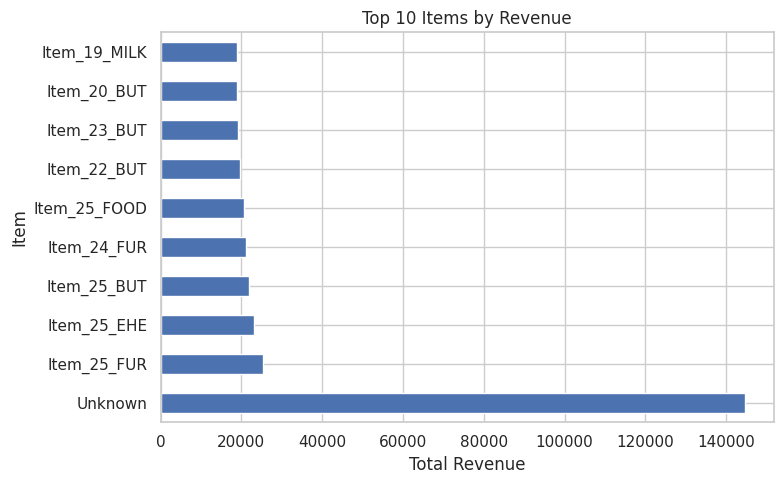

In [18]:
top_items = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='barh', figsize=(8,5), title='Top 10 Items by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

##  Monthly Sales Trend

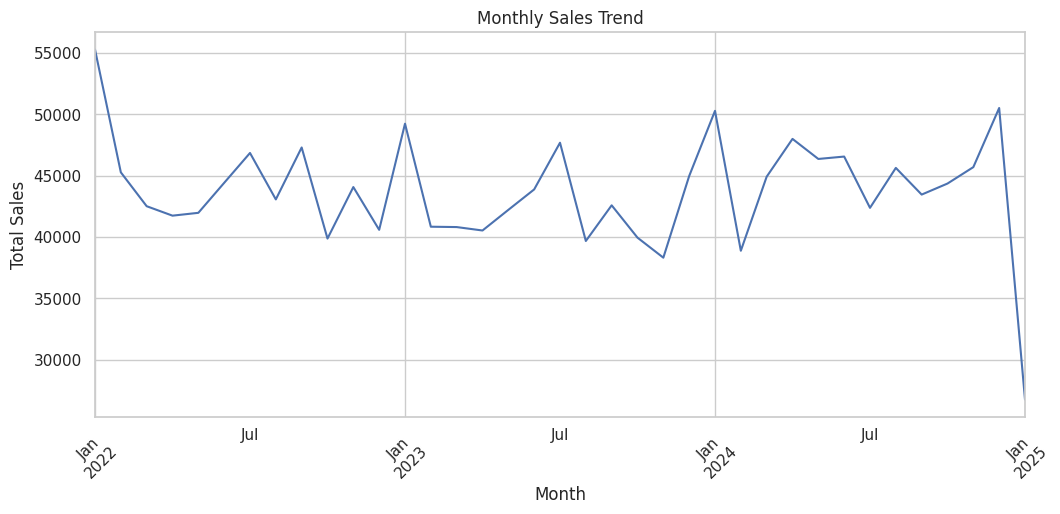

In [19]:
# Total monthly sales
monthly_sales = df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum()
monthly_sales.plot(kind='line', figsize=(12,5), title='Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

##  Category-wise Sales

/tmp/ipython-input-3482672098.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Total Spent', estimator='sum', ci=None)


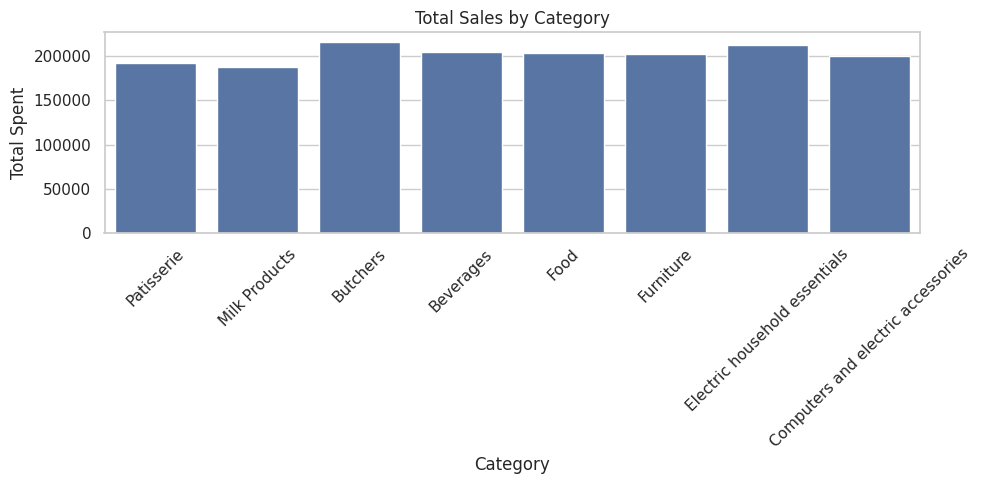

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Category', y='Total Spent', estimator='sum', ci=None)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Payment Method Preferences

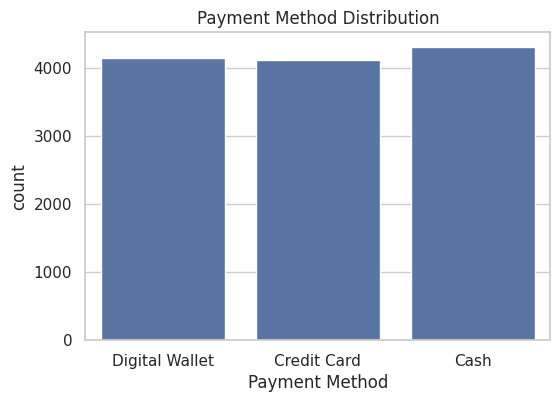

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Payment Method')
plt.title('Payment Method Distribution')
plt.show()

##  Impact of Discounts on Spending

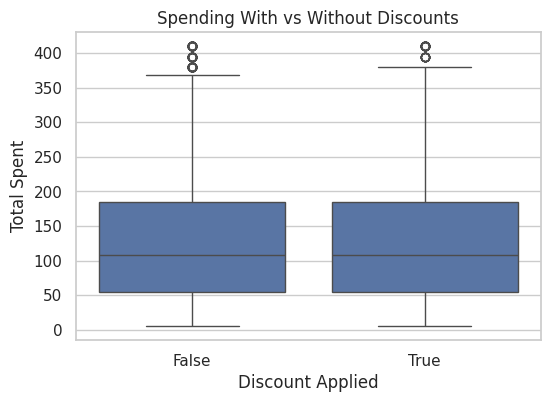

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Discount Applied', y='Total Spent')
plt.title('Spending With vs Without Discounts')
plt.show()